In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

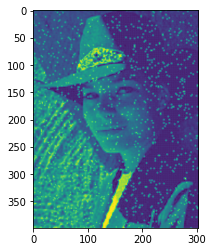

In [21]:
img = cv2.imread('./image/anh_nhieu.png', 0)
plt.imshow(img)
plt.show()

Trung bình số học

In [22]:
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)
row = img.shape[0] + filter.shape[0] - 1
col = img.shape[1] + filter.shape[1] - 1
img_1 = np.zeros((row, col))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_1[i + int((filter.shape[0] - 1) // 2), j + int((filter.shape[1] - 1) // 2)] = img[i, j]
img_1

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 108., ...,  82.,   0.,   0.],
       ...,
       [  0.,   0., 178., ...,  70.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

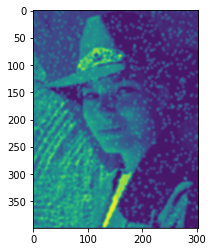

In [23]:
img_1_res = np.array(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]]
        res = np.sum(temp * filter)
        img_1_res[i, j] = res
plt.imshow(img_1_res)
plt.show()

Trung bình hình học

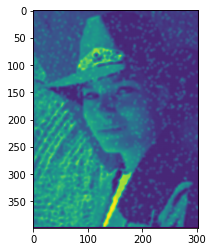

In [24]:
img_2_res = np.array(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]]
        res = np.prod(temp ** filter)
        img_2_res[i, j] = res
plt.imshow(img_2_res)
plt.show()

Trung bình Harmonic

C:\Users\levan\.conda\envs\nt4rever\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  """


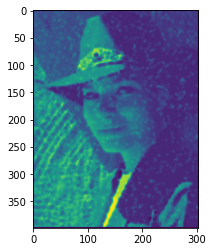

In [25]:
img_3_res = np.array(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]]
        res = (filter.shape[0] * filter.shape[1]) // np.sum(np.reciprocal(temp))
        img_3_res[i, j] = res
plt.imshow(img_3_res)
plt.show()

Trung bình Contraharmonic

C:\Users\levan\.conda\envs\nt4rever\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


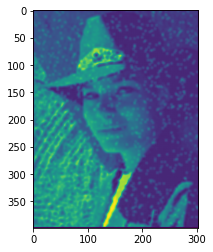

In [28]:
Q = -0.5
img_4_res = np.array(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]]
        res = (np.sum(temp ** (Q + 1))) // (np.sum(temp ** Q))
        img_4_res[i, j] = res
plt.imshow(img_4_res)
plt.show()

Lọc trung vị

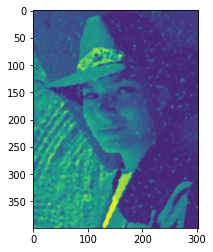

In [29]:
img_5_res = np.array(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]]
        res = np.median(temp)
        img_5_res[i, j] = res
plt.imshow(img_5_res)
plt.show()

Lọc Max, Min

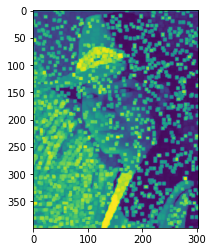

In [32]:
img_6_res = np.array(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]]
        res = np.amax(temp)
        img_6_res[i, j] = res
plt.imshow(img_6_res)
plt.show()

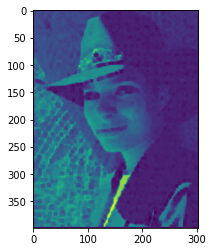

In [31]:
img_7_res = np.array(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]]
        res = np.amin(temp)
        img_7_res[i, j] = res
plt.imshow(img_7_res)
plt.show()

 Lọc Midpoint

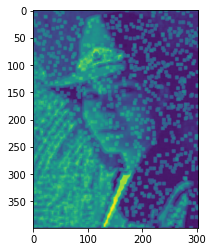

In [33]:
img_8_res = np.array(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]]
        res = np.amax(temp * (1/2)) + np.amin(temp * (1/2))
        img_8_res[i, j] = res
plt.imshow(img_8_res)
plt.show()

 Lọc cắt Alpha

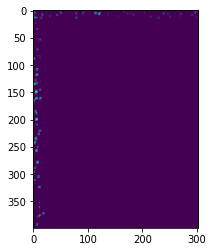

In [35]:
img_9_res = np.array(img)
d = 2
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = img_1[i:i+filter.shape[0], j:j+filter.shape[1]].copy()
        # max
        indices = temp.argpartition(temp.size - (d//2), axis = None)[-(d//2):]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        # min
        indices = temp.argpartition(temp.size - (d//2), axis = None)[:(d//2)]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        res = np.sum(temp * filter)
        img_9_res[i, j] = res
plt.imshow(img_9_res)
plt.show()